In [2]:
# Modelo de Machine Learning
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

print('librerias de clusterizacion y machine learning cargadas')

librerias de clusterizacion y machine learning cargadas


In [3]:
# iniciamos el ajuste del modelo no supervisado
caracteristicas = pd.read_csv('./caracteristicas.csv')

modelo = caracteristicas.drop(columns = ['type', 'uri', 'track_href', 'analysis_url', 'duration_ms','time_signature'], axis = 1)
modelo.reset_index(inplace = True)
modelo.set_index('id', inplace = True)
modelo = modelo.astype('float64')

0.7259262564599993
weighted


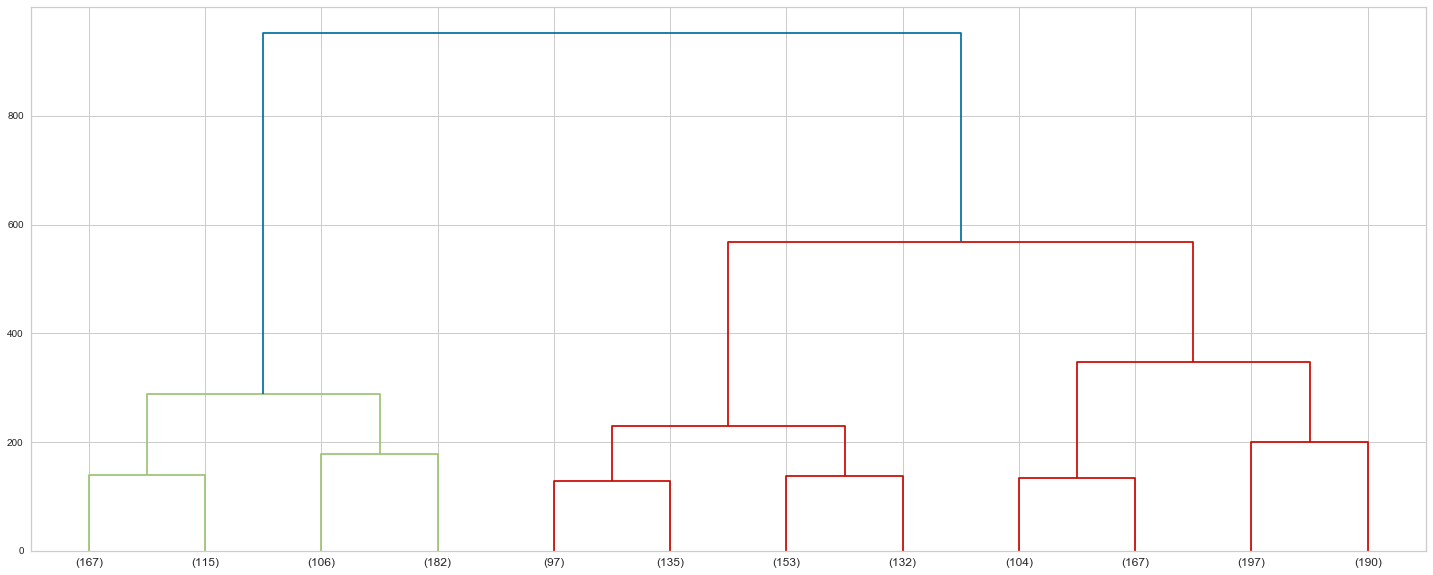

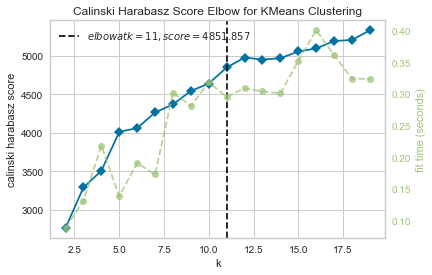

In [4]:
# Dendograma
# Comenzare haciendo Hierarchical clustering con la finalidad de disminuir la cantidad de clusters, hare una copia de los datos que ya estan limpios y disponibles, lo llamaré dendogram

dendogram = modelo.copy()
#He probado con los metodos single, complete, average, centroid, median, ward y al final trabajaremos con el weighted que es el que mejor resultado nos ha dado
weighted = linkage(dendogram, method='weighted')

# Weighted
cweighted, coph_distsweighted = cophenet(weighted, pdist(dendogram))
print(cweighted)

# Cantidad de clusters del modelo elegido
print('weighted')
fig = plt.figure(figsize=(25, 10))
weightedplt = dendrogram(
    weighted,
    truncate_mode = 'lastp',
    p=12
)
plt.show()

calinski_harabasz = KMeans()
visualizer = KElbowVisualizer(calinski_harabasz, k=(2, 20), metric='calinski_harabasz')
visualizer.fit(weighted)
visualizer.poof();
# Basandome en la informacion anterior, trabajare con 12 clusters

In [5]:
# K-means

# 12 es el resultado que mas satisface a mis necesidades, puesto que mientras mas cluster tenga, mayor va a ser el rango de tempo que podre usar y este se va a ajustar mejor a las medidas del corazon que tienen que estar entre 60 bpm minimo y 200 bpm máximo
# Sin embargo, después de hacer una primera prueba, 12 clusters me sirven mucho, por eso, usaré 25

#creamos el modelo, definimos la cantidad de clusters, entrenamos, predecimos, calculamos distancias y agregamos ese nuevo campo al dataframe
meansK12 = modelo.copy()
kmeans12 = KMeans(n_clusters=25)
spoty_clusters12 = kmeans12.fit(meansK12)
print('Centros')
print(spoty_clusters12.cluster_centers_)
print()
#predicciones para el modelo
predictions12 = spoty_clusters12.fit_predict(meansK12)
print('Predicciones')
print(predictions12)
print()
#Distancias entre cada prediccion
distances12 = spoty_clusters12.fit_transform(meansK12)
print('Distancias')
print(distances12)
#creamos nueva columna con las predicciones 
meansK12['Cluster12'] = predictions12

Centros
[[ 1.43638462e+03  5.85568132e-01  5.86167033e-01  5.56043956e+00
  -1.12852198e+01  5.60439560e-01  5.90791209e-02  1.95553549e-01
   7.62440659e-01  1.71640659e-01  3.26589011e-01  1.30213868e+02]
 [ 4.19208333e+02  4.55083333e-01  5.88333333e-01  5.45833333e+00
  -7.80562500e+00  4.16666667e-01  5.52916667e-02  3.62952500e-01
   3.46076521e-02  2.98729167e-01  4.82533333e-01  1.66978167e+02]
 [ 1.03178333e+03  3.61898333e-01  2.66775000e-01  5.90000000e+00
  -1.52628667e+01  5.50000000e-01  5.29650000e-02  8.06722872e-01
   6.63282605e-01  1.39588333e-01  2.33131667e-01  8.67674167e+01]
 [ 4.04814815e+01  2.13874074e-01  2.11452099e-01  3.81481481e+00
  -1.91421852e+01  6.54320988e-01  4.44703704e-02  7.20843210e-01
   8.27171605e-01  1.39932099e-01  9.65827160e-02  9.34000988e+01]
 [ 6.54947368e+02  2.76913158e-01  3.18823421e-01  5.26315789e+00
  -1.69470132e+01  5.00000000e-01  4.22657895e-02  5.65974079e-01
   8.38342105e-01  1.20877632e-01  1.07302632e-01  1.00222329e+0

In [6]:
meansK12.reset_index(inplace = True)

In [7]:
meansK12.to_csv("./clusterizado.csv", index = False)

In [7]:
#agrupamos el dataframe pormedio de la columna cluster12, y usamos el promedio del tempo, para crear una serie
terminado = meansK12.groupby(['Cluster12'])['tempo'].mean()

Lectura de dedito 

In [8]:
from fingerbeat import dedito

Fingerbeat importado y sanito


In [10]:
dedopromedio = dedito()
print(dedopromedio)

pulso:  0 leido:  138.57
pulso:  1 leido:  138.57
pulso:  2 leido:  138.57
pulso:  3 leido:  138.57
pulso:  4 leido:  138.57
pulso:  5 leido:  138.57
pulso:  6 leido:  138.57
pulso:  7 leido:  138.57
pulso:  8 leido:  138.57
pulso:  9 leido:  138.57
pulso:  10 leido:  138.57
pulso:  11 leido:  138.57
pulso:  12 leido:  138.57
pulso:  13 leido:  138.57
pulso:  14 leido:  138.57
pulso:  15 leido:  138.57
pulso:  16 leido:  138.57
pulso:  17 leido:  138.57
pulso:  18 leido:  138.57
pulso:  19 leido:  138.57
pulso:  20 leido:  138.57
pulso:  21 leido:  138.57
pulso:  22 leido:  138.57
pulso:  23 leido:  138.57
pulso:  24 leido:  138.57
pulso:  25 leido:  138.57
pulso:  26 leido:  138.57
pulso:  27 leido:  138.57
pulso:  28 leido:  138.57
pulso:  29 leido:  138.57
pulso:  30 leido:  138.57
pulso:  31 leido:  138.57
pulso:  32 leido:  138.57
pulso:  33 leido:  138.57
pulso:  34 leido:  138.57
pulso:  35 leido:  138.57
pulso:  36 leido:  138.57
pulso:  37 leido:  138.57
pulso:  38 leido:  138

In [11]:
#despues de la lectura de los pulsos, hay que usar el valor que mas se acerque a 0, por lo tanto traere el valor minimo y lo comparare con el indice de la lista reformada
reformado = np.array([], dtype = float)
for lectura in terminado:
    reformado = np.append(reformado, abs(lectura - dedopromedio))

In [12]:
cercanocero = reformado.min()
cluster = 0
for indice in range(len(reformado)):
    if reformado[indice]== cercanocero:
        cluster= indice
recomendacion = meansK12[meansK12['Cluster12'] == cluster]

In [13]:
recomendacion = recomendacion.rename(columns = {'id':'track.id'})

In [14]:
recomendacion

,track.id,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Cluster12
1348,5SgO7ZvlJ9BOEVf9JV0H5G,1348.0,0.0838,0.01640,0.0,-37.033,1.0,0.0504,0.800000,0.9420,0.0847,0.0375,168.828,14
1349,7MGFhIe9CBI5baTwLMj7iE,1349.0,0.0828,0.01200,9.0,-36.045,0.0,0.0451,0.900000,0.8120,0.0875,0.0578,169.895,14
1359,7uhc5ZnEe8gHVvoye4A7Ic,1359.0,0.1530,0.39300,7.0,-17.122,0.0,0.0493,0.811000,0.9180,0.1150,0.0399,150.126,14
1364,7EaVdKxevkzroLrxYzjKPm,1364.0,0.1590,0.07940,2.0,-22.172,0.0,0.0392,0.800000,0.9020,0.0818,0.0391,132.329,14
1366,2CPnPnfbCMESaNpBQbeA0X,1366.0,0.4750,0.09310,2.0,-20.771,0.0,0.0532,0.990000,0.9510,0.0899,0.1880,134.217,14
1367,7lNCCeskkRzCh3jNYXBzPH,1367.0,0.2630,0.59000,0.0,-7.137,1.0,0.0431,0.221000,0.9210,0.1380,0.2220,175.766,14
1372,1iZ7Iic1SaWCvMXplKAjqs,1372.0,0.0775,0.06310,5.0,-21.522,1.0,0.0410,0.824000,0.9100,0.0922,0.0380,175.466,14
1374,5YvHk8Gkt9x33mR0xNikuM,1374.0,0.3830,0.00868,0.0,-27.996,1.0,0.0673,0.992000,0.9630,0.0643,0.3270,139.089,14
1377,63nKTqaUM36EkTqbKa0fqm,1377.0,0.1370,0.12500,0.0,-16.977,1.0,0.0433,0.880000,0.9490,0.1110,0.0317,141.752,14
1379,2OcUSuvHINLaIaXXA3tN8M,1379.0,0.1420,0.21300,4.0,-19.131,0.0,0.0372,0.605000,0.9010,0.1250,0.0390,147.864,14


# Presentación de Playlist

In [15]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
import time
import random



In [16]:
original = pd.read_csv('./SpotifyApi.csv')
href = pd.merge(original, recomendacion, on='track.id', how='left')
href.dropna(inplace = True)

In [17]:
external = href['track.external_urls.spotify']

In [19]:
driver = webdriver.Chrome()
driver.get('https://open.spotify.com')
driver.find_element_by_xpath("/html/body/div[1]/div/div[5]/div[1]/nav/div[2]/div/p[2]/button").click()
time.sleep(2)
driver.find_element_by_xpath("/html/body/div[1]/div[2]/div/div[2]/div/a").click()
time.sleep(1)

usr='shiroiusagi4486@gmail.com'
pwd='wero5039'

username_box = driver.find_element_by_id('email') 
username_box.send_keys(usr) 
print ("Email Id entered") 
time.sleep(1) 

password_box = driver.find_element_by_id('pass') 
password_box.send_keys(pwd) 
print ("Password entered") 

login_box = driver.find_element_by_id('loginbutton') 
login_box.click()
print ("Done") 

aleatorio = random.sample(external, k=10)

for url in aleatorio
    driver.get(url)
    time.sleep(120)

driver.quit()

Email Id entered
Password entered
Done


WebDriverException: Message: Failed to decode response from marionette


Done
